In [1]:
from scipy import *
from numpy import *
from matplotlib.pyplot import *
from scipy.linalg import *
from numpy.linalg import *
from scipy.interpolate import interp1d
from scipy.integrate import quadrature
import FNC

In [2]:
# This (optional) block is for improving the display of plots.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg","pdf")
rcParams["figure.figsize"] = [7,4]
rcParams["lines.linewidth"] = 2
rcParams["lines.markersize"] = 4
rcParams['animation.html'] = "jshtml"  # or try "html5"

# Example 5.1.1

Here are some points that we could consider to be observations of an unknown function on $[-1,1]$.

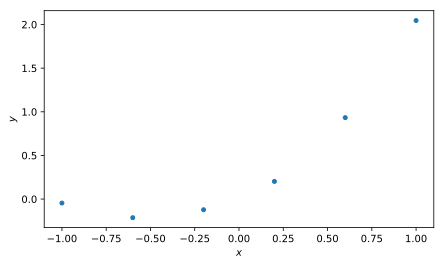

In [3]:
n = 5
t = linspace(-1,1,n+1)
y = t**2 + t + 0.05*sin(20*t)
fig,ax = subplots()
plot(t,y,"o",label="data")
xlabel("$x$");  ylabel("$y$");

The polynomial interpolant, as computed using `polyfit`, looks very sensible. It's the kind of function you'd take home to meet your parents.  The interpolant plot is created using @glsbegin@fplot@glsend@.

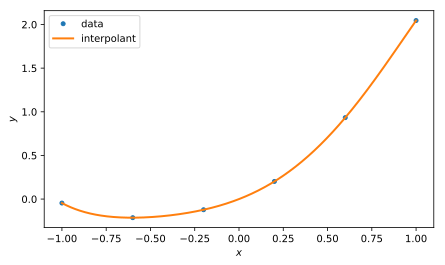

In [4]:
p = poly1d( polyfit(t,y,n) )    # interpolating polynomial
tt = linspace(-1,1,400)
ax.plot(tt,p(tt),label="interpolant")
ax.legend()
fig

But now consider a different set of points generated in almost exactly the same way.

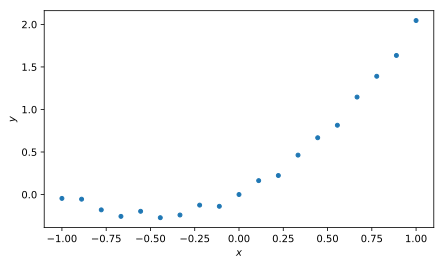

In [5]:
n = 18
t = linspace(-1,1,n+1)
y = t**2 + t + 0.05*sin(20*t)
fig,ax = subplots()
plot(t,y,"o",label="data")
xlabel("$x$");  ylabel("$y$");

The points themselves are unremarkable. But take a look at what happens to the polynomial interpolant.

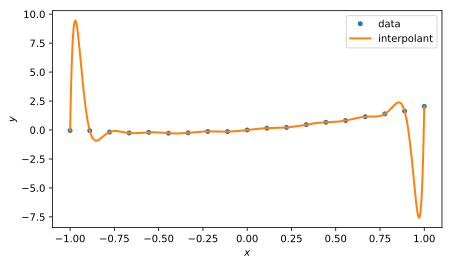

In [6]:
p = poly1d(polyfit(t,y,n))
ax.plot(tt,p(tt),label="interpolant")
ax.legend()
fig

Surely there must be functions that are more intuitively representative of those points!

# Example 5.1.3

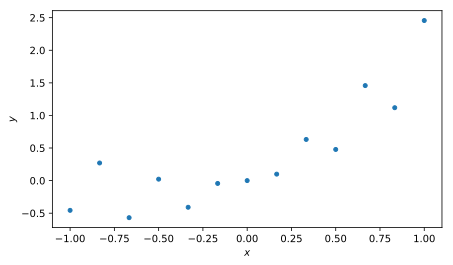

In [7]:
n = 12
t = linspace(-1,1,n+1)
y = t**2 + t + 0.5*sin(20*t)
fig,ax = subplots()
plot(t,y,"o",label="data")
xlabel("$x$");  ylabel("$y$");

The `scipy.interpolate` module makes it easy to construct some standard interpolating functions. Here is one that is linear between each pair of consecutive nodes.

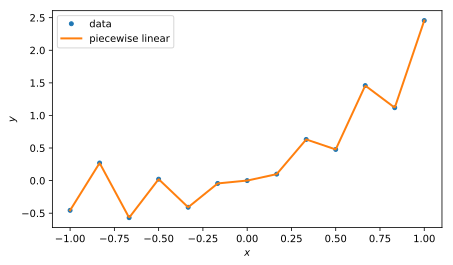

In [8]:
p = interp1d(t,y,kind="linear")
tt = linspace(-1,1,400)
ax.plot(tt,p(tt),label="piecewise linear")
ax.legend();
fig

We may instead request a smoother interpolant that is piecewise cubic.

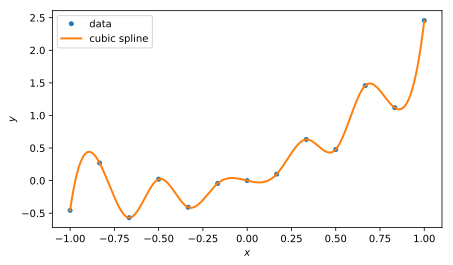

In [9]:
plot(t,y,"o",label="data") 
p = interp1d(t,y,kind="cubic")
tt = linspace(-1,1,400)
plot(tt,p(tt),label="cubic spline")
xlabel("$x$");  ylabel("$y$");
legend();

# Example 5.1.4

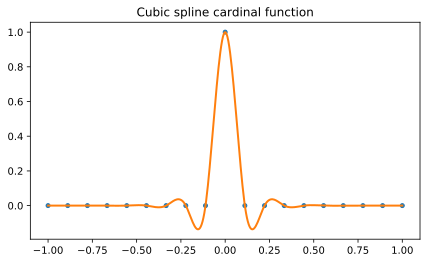

In [10]:
n = 18
t = linspace(-1,1,n+1)
y = zeros(n+1)
y[9] = 1.0
plot(t,y,"o",label="data")

p = FNC.spinterp(t,y)
tt = linspace(-1,1,400)
plot(tt,p(tt))
title("Cubic spline cardinal function");

The piecewise cubic cardinal function is nowhere greater than one in absolute value. This happens to be true for all the cardinal functions, ensuring a good condition number for the interpolation. But the story for global polynomials is very different.

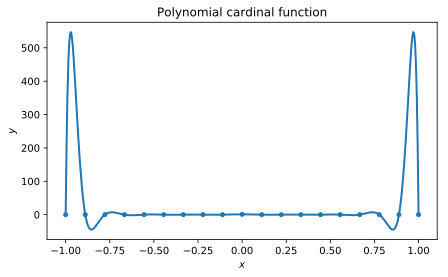

In [11]:
scatter(t,y,label="data")
p = poly1d( polyfit(t,y,n) )
plot(tt,p(tt),label="polynomial")
xlabel("$x$");  ylabel("$y$");
title("Polynomial cardinal function");

From the figure we can see that the condition number for polynomial interpolation on these nodes is at least 500. 

# Example 5.2.1

Let's define a set of 6 nodes (i.e., $n=5$ in our formulas). 

In [12]:
t = array([0, 0.075, 0.25, 0.55, 0.7, 1])

We plot the hat functions $H_0,\ldots,H_5$.  

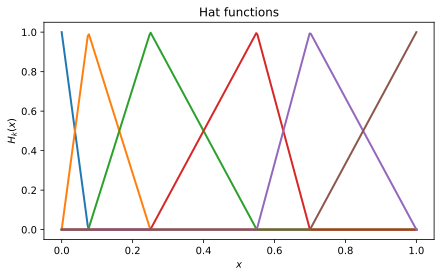

In [13]:
x = linspace(0,1,300)
for k in range(6):
    plot(x,FNC.hatfun(x,t,k))
xlabel("$x$") 
ylabel("$H_k(x)$")
title("Hat functions");

# Example 5.2.2

We generate a piecewise linear interpolant of $f(x)=e^{\sin 7x}$. 

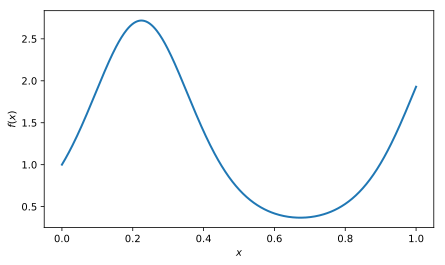

In [14]:
f = lambda x: exp(sin(7*x))
x = linspace(0,1,400)
fig,ax = subplots()
plot(x,f(x),label="function")
xlabel("$x$");
ylabel("$f(x)$");

First we sample the function to create the data.

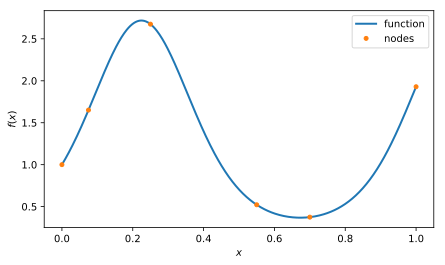

In [15]:
t = array([0, 0.075, 0.25, 0.55, 0.7, 1])    # nodes
y = f(t)                                     # function values

ax.plot(t,y,"o",label="nodes")
ax.legend();
fig

Now we create a callable function that will evaluate the piecewise linear interpolant at any $x$.

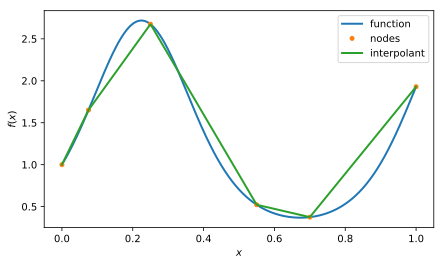

In [16]:
p = FNC.plinterp(t,y)
ax.plot(x,p(x),label="interpolant")
ax.legend(); fig

We measure the convergence rate for piecewise linear interpolation of $e^{\sin 7x}$.

# Example 5.2.3

In [17]:
f = lambda x: exp(sin(7*x))
x = linspace(0,1,10000)     # sample the difference at many points
N = 2**arange(3,11)
err = zeros(N.size)
for (i,n) in enumerate(N):
    t = linspace(0,1,n+1)   # interpolation nodes
    p = FNC.plinterp(t,f(t))
    err[i] = max( abs(f(x)-p(x)) )
print(err)

[2.16029984e-01 6.38173511e-02 1.60381329e-02 4.05882168e-03
 1.01556687e-03 2.54022468e-04 6.35007579e-05 1.58778800e-05]


Since we expect convergence that is $O(h^2)=O(n^{-2})$, we use a log-log graph of error and expect a straight line of slope $-2$.

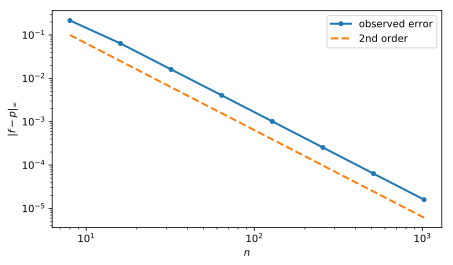

In [18]:
order2 = 0.1*(N/N[0])**(-2)
loglog(N,err,"-o",label="observed error")
loglog(N,order2,"--",label="2nd order")
xlabel("$n$");
ylabel("$\|f-p\|_\infty$");
legend();

# Example 5.3.1

For illustration, here is a spline interpolant using just a few nodes. 

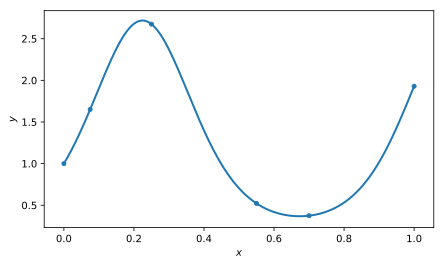

In [19]:
f = lambda x: exp(sin(7*x))

x = linspace(0,1,500)
fig,ax = subplots()
ax.plot(x,f(x),label="function")

t = array([0, 0.075, 0.25, 0.55, 0.7, 1])  # nodes
y = f(t)                                   # values at nodes

xlabel("$x$");  ylabel("$y$");
ax.scatter(t,y,label="nodes");

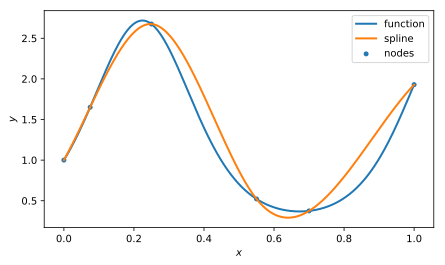

In [20]:
S = FNC.spinterp(t,y)
ax.plot(x,S(x),label="spline")
ax.legend(); fig

Now we look at the convergence rate as the number of nodes increases.

In [21]:
N = floor(2**linspace(3,8,17))
err = zeros(N.size)
for (i,n) in enumerate(N):
    t = linspace(0,1,n+1)   # interpolation nodes
    p = FNC.spinterp(t,f(t))
    err[i] = max( abs(f(x)-p(x)) )
print(err)

[3.05633432e-02 2.39601586e-02 1.68054365e-02 7.64098319e-03
 2.89472870e-03 1.34574135e-03 5.43142890e-04 2.28104055e-04
 9.17629364e-05 3.71552636e-05 1.56015311e-05 6.34890672e-06
 2.53866817e-06 9.98323636e-07 4.35498457e-07 1.75251505e-07
 6.59321331e-08]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


Since we expect convergence that is $O(h^4)=O(n^{-4})$, we use a log-log graph of error and expect a straight line of slope $-4$.

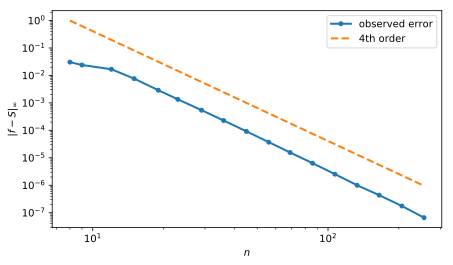

In [22]:
order4 = (N/N[0])**(-4)
loglog(N,err,"-o",label="observed error")
loglog(N,order4,"--",label="4th order")
xlabel("$n$");
ylabel("$\|f-S\|_\infty$");
legend();

# Example 5.4.2

We try to estimate the derivative of $\cos(x^2)$ at $x=0.5$ using five nodes. 

In [23]:
t = array([0.35,0.5,0.57,0.6,0.75])   # nodes
f = lambda x: cos(x**2)
dfdx = lambda x: -2*x*sin(x**2)
print("exact value:",dfdx(0.5))

exact value: -0.24740395925452294


We have to shift the nodes so that the point of estimation for the derivative is at $x=0$. 

In [24]:
w = FNC.fdweights(t-0.5,1)
print(w)

[-0.5303030303030298, -21.61904761904763, 45.09379509379508, -23.333333333333307, 0.38888888888888845]


In [25]:
print("FD value:",dot(w,f(t)))

FD value: -0.247307422906135


We can reproduce the weights in the finite difference tables by using equally spaced nodes with $h=1$. For example, here is a one-sided formula.

In [26]:
print(FNC.fdweights(array([0,1,2]),1))

[-1.5, 2.0, -0.5]


# Example 5.5.2

Let's observe the convergence of the forward-difference formula applied to the function $\sin(e^{x+1})$ at $x=0$. 

In [27]:
f = lambda x: sin( exp(x+1) )
FD1 = [ (f(0.1)-f(0))   /0.1,
        (f(0.05)-f(0))  /0.05,
        (f(0.025)-f(0)) /0.025 ]
print(FD1)

[-2.7378682758093618, -2.612795285613694, -2.5464969752366606]


It's not clear that the sequence is converging. As predicted, however, the errors are cut approximately by a factor of 2 when $h$ is divided by 2.

In [28]:
exact_value = cos(exp(1))*exp(1)
print("error:",exact_value - FD1)

error: [0.25951854 0.13444555 0.06814724]


Asymptotically as $h\to0$, the error is proportional to $h$.

# Example 5.5.4

In [29]:
f = lambda x: sin( exp(x+1) )
exact_value = cos(exp(1))*exp(1)
print("exact value:",exact_value)

exact value: -2.478349732955235


We'll run both formulas in parallel for a sequence of $h$ values.

In [30]:
h_ = 4.**linspace(-1,-8,8)
FD1 = 0*h_;  FD2 = 0*h_;
for (k,h) in enumerate(h_):
    FD1[k] = (f(h) - f(0)) / h
    FD2[k] = (f(h) - f(-h)) / (2*h)

In each case $h$ is decreased by a factor of 4, so that the error is reduced by a factor of 4 in the first-order method and 16 in the second-order method.

In [31]:
error_FD1 = exact_value-FD1 
error_FD2 = exact_value-FD2
print("     h       FD1         FD2")
for k in range(8):
    print(f"{h_[k]:8.3g}  {error_FD1[k]:8.3e}  {error_FD2[k]:8.3e}")

     h       FD1         FD2
    0.25  5.317e-01  -8.590e-02
  0.0625  1.668e-01  -4.444e-03
  0.0156  4.278e-02  -2.740e-04
 0.00391  1.075e-02  -1.711e-05
0.000977  2.691e-03  -1.069e-06
0.000244  6.730e-04  -6.684e-08
 6.1e-05  1.683e-04  -4.176e-09
1.53e-05  4.207e-05  -2.618e-10


A graphical comparison can be clearer. On a log-log scale, the error should (roughly) be a straight line whose slope is the order of accuracy. However, it's conventional in convergence plots, to show $h$ _decreasing_ from left to right, which negates the slopes.

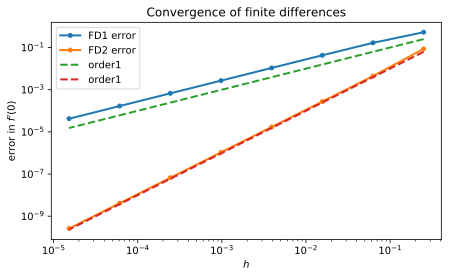

In [32]:
loglog(h_,abs(error_FD1),"-o",label="FD1 error")
loglog(h_,abs(error_FD2),"-o",label="FD2 error")
plot(h_,h_,"--",label="order1")
plot(h_,h_**2,"--",label="order1")
xlabel("$h$");
ylabel("error in $f'(0)$");
title("Convergence of finite differences");
legend();

# Example 5.5.5

Let $f(x)=e^{-1.3x}$. We apply finite difference formulas of first, second, and fourth order to estimate $f'(0)=-1.3$.

In [33]:
H = 1/10**linspace(1,12,12)
f = lambda x: exp(-1.3*x);
fd1 = zeros(H.size)
fd2 = zeros(H.size)
fd4 = zeros(H.size)
for (j,h) in enumerate(H): 
    nodes = h*linspace(-2,2,5)
    vals = f(nodes)/h
    fd1[j] = dot([   0,    0, -1,    1,     0],vals)
    fd2[j] = dot([   0, -1/2,  0,  1/2,     0],vals)
    fd4[j] = dot([1/12, -2/3,  0,  2/3, -1/12],vals)

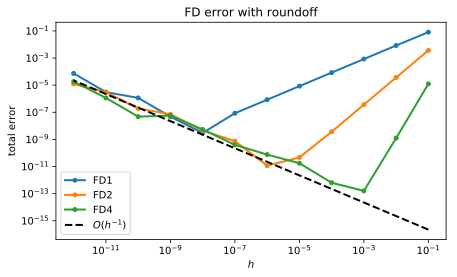

In [34]:
loglog(H,abs(fd1+1.3),"-o",label="FD1")
loglog(H,abs(fd2+1.3),"-o",label="FD2")
loglog(H,abs(fd4+1.3),"-o",label="FD4")
plot(H,0.1*2**(-52)/H,"--",color="k",label="$O(h^{-1})$")
xlabel("$h$")
ylabel("total error")
title("FD error with roundoff"); legend();

Again the graph is made so that $h$ decreases from left to right. The errors are dominated at first by truncation error, which decreases most rapidly for the 4th order formula. However, increasing roundoff error eventually equals and then dominates the truncation error as $h$ continues to decrease. As the order of accuracy increases, the crossover point moves to the left (greater efficiency) and down (greater accuracy). 

# Example 5.6.1

The antiderivative of $e^x$ is, of course, itself. That makes evaluation of $\int_0^1 e^x\,dx$ by the Fundamental Theorem trivial.

In [35]:
exp(1)-1

1.718281828459045

The module `scipy.integrate` has multiple functions that estimate the value of an integral numerically without finding the antiderivative first. As you can see here, it's often just as accurate. 

In [36]:
Q,errest = quadrature(exp,0,1,tol=1e-15,rtol=1e-15)
print(Q)

1.7182818284590453


The numerical approach is far more robust. For example, $e^{\sin x}$ has no useful antiderivative. But numerically it's no more difficult. 

In [37]:
Q,errest = quadrature(lambda x: exp(sin(x)),0,1,tol=1e-15,rtol=1e-15)
print(Q)

1.6318696084180513


When you look at the graphs of these functions, what's remarkable is that one of these areas is the most basic calculus while the other is almost impenetrable analytically. From a numerical standpoint, they are practically the same problem.

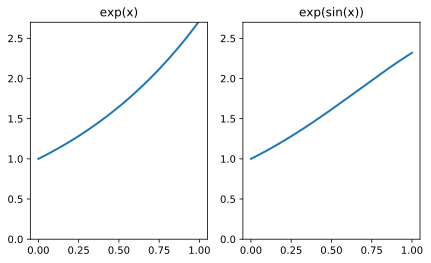

In [38]:
x = linspace(0,1,300)
subplot(1,2,1)
plot(x,exp(x))
ylim([0,2.7]); title("exp(x)");
subplot(1,2,2)
plot(x,exp(sin(x)))
ylim([0,2.7]); title("exp(sin(x))");

# Example 5.6.2

We approximate the integral of the function $f(x)=e^{\sin 7x}$ over the interval $[0,2]$. 

In [39]:
f = lambda x: exp(sin(7*x))
a = 0;  b = 2;

In lieu of the exact value, we will use the `quadrature` function to find an accurate result.

In [40]:
I,errest = quadrature(f,a,b,tol=1e-14,rtol=1e-14);
print("Integral =",I)

Integral = 2.6632197827615434


Here is the error at $n=40$. 

In [41]:
T,t,y = FNC.trapezoid(f,a,b,40)
print("Trapezoid:",T)
print("error:",I - T)

Trapezoid: 2.662302935602287
error: 0.0009168471592562177


In order to check the order of accuracy, we double $n$ a few times and observe how the error decreases.

In [42]:
N = 40*2**arange(6)
err = zeros(size(N))
print("     n     error")
for (k,n) in enumerate(N):
    T,t,y = FNC.trapezoid(f,a,b,n)
    err[k] = I - T
    print(f"{n:6d}   {err[k]:8.3e} ")


     n     error
    40   9.168e-04 
    80   2.301e-04 
   160   5.757e-05 
   320   1.440e-05 
   640   3.599e-06 
  1280   8.998e-07 


Each doubling of $n$ cuts the error by a factor of about 4, which is consistent with second-order convergence. Another check: the slope on a log-log graph should be $-2$.

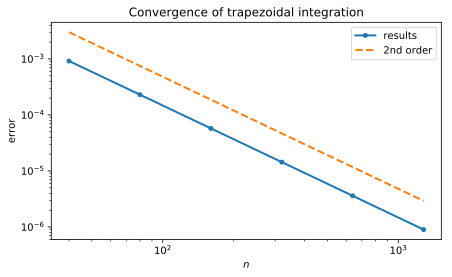

In [43]:
loglog(N,abs(err),"-o",label="results")
loglog(N,3e-3*(N/N[0])**(-2),"--",label="2nd order")
xlabel("$n$");
ylabel("error");
legend(); title("Convergence of trapezoidal integration");

# Example 5.6.3

We estimate $\displaystyle\int_0^2 x^2 e^{-2x}\, dx$ using extrapolation. 

In [44]:
f = lambda x: x**2*exp(-2*x)
a = 0;  b = 2; 
I,errest = quadrature(f,a,b,tol=1e-14,rtol=1e-14)
print("integral:",I)

integral: 0.19047417361161406


We start with the trapezoid formula on $n=N$ nodes.

In [45]:
N = 20;       # the coarsest formula
n = N;  h = (b-a)/n;
t = h*arange(n+1);   y = f(t);

We can now apply weights to get the estimate $T_f(N)$. 

In [46]:
T = zeros(3)
T[0] = h*( sum(y[1:-1]) + y[0]/2 + y[-1]/2 )
print("error (2nd order):",I - T[0])

error (2nd order): 6.2723672346221e-05


Now we double to $n=2N$, but we only need to evaluate $f$ at every other interior node.

In [47]:
n = 2*n;  h = h/2;  t = h*arange(n+1);
T[1] = T[0]/2 + h*sum( f(t[1:-1:2]) ) 
print("error (2nd order):",I - T[:2])

error (2nd order): [6.27236723e-05 1.53677521e-05]


As expected for a second-order estimate, the error went down by a factor of about 4. We can repeat the same code to double $n$ again.

In [48]:
n = 2*n;  h = h/2;  t = h*arange(n+1);
T[2] = T[1]/2 + h*sum( f(t[1:-1:2]) ) 
print("error (2nd order):",I - T[:3])

error (2nd order): [6.27236723e-05 1.53677521e-05 3.82230697e-06]


Let us now do the first level of extrapolation to get results from Simpson's formula. We combine the elements `T[i]` and `T[i+1]` the same way for $i=1$ and $i=2$.

In [49]:
S = array([ (4*T[i+1]-T[i])/3 for i in range(2) ])
print("error (4th order):",I - S)

error (4th order): [-4.17554646e-07 -2.61747411e-08]


With the two Simpson values $S_f(N)$ and $S_f(2N)$ in hand, we can do one more level of extrapolation to get a 6th-order accurate result.

In [50]:
R = (16*S[1] - S[0]) / 15
print("error (6th order):",I - R)

error (6th order): -8.274744778269394e-11


If we consider the computational time to be dominated by evaluations of $f$, then we have obtained a result with twice as many accurate digits as the best trapezoid result, at virtually no extra cost.

# Example 5.7.1

This function gets increasingly oscillatory near the right endpoint.

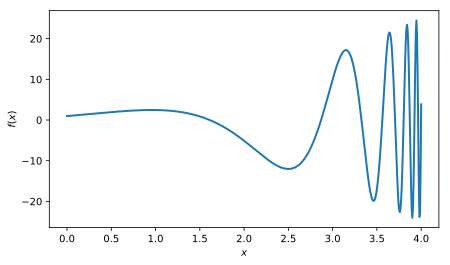

In [51]:
f = lambda x: (x+1)**2*cos((2*x+1)/(x-4.3))
x = linspace(0,4,600)
plot(x,f(x))
xlabel("$x$"); ylabel("$f(x)$");

Accordingly, the trapezoid rule is more accurate on the left half of the interval than on the right half.

In [52]:
N = 50*2**arange(4)
Tleft = zeros(4); Tright = zeros(4);
for (i,n) in enumerate(N):
    Tleft[i] = FNC.trapezoid(f,0,2,n)[0] 
    Tright[i] = FNC.trapezoid(f,2,4,n)[0] 
print("left half:",Tleft)
print("right half:",Tright)

left half: [2.00419122 2.00605957 2.00652661 2.00664337]
right half: [-4.32798637 -4.73621129 -4.80966839 -4.82666144]


In [53]:
left_val,err = quadrature(f,0,2,tol=1e-13,rtol=1e-13)
right_val,err = quadrature(f,2,4,tol=1e-13,rtol=1e-13)

print("   n      left error   right error")
for k in range(N.size):
    print(f"  {N[k]:4}    {Tleft[k]-left_val:8.3e}    {Tleft[k]-left_val:8.3e}")

   n      left error   right error
    50    -2.491e-03    -2.491e-03
   100    -6.227e-04    -6.227e-04
   200    -1.557e-04    -1.557e-04
   400    -3.892e-05    -3.892e-05


Both the picture and the numbers suggest that more nodes should be used on the right half of the interval than on the left half.

# Example 5.7.2

In [54]:
f = lambda x: (x+1)**2*cos((2*x+1)/(x-4.3))
I,errest = quadrature(f,0,4,tol=1e-14,rtol=1e-14,maxiter=100);  # 'exact' value
print("integral:",I)

integral: -2.8255333734373873


We perform the integration and show the nodes selected underneath the curve. 

number of nodes: 69


Text(0.5,1,'Adaptive node selection')

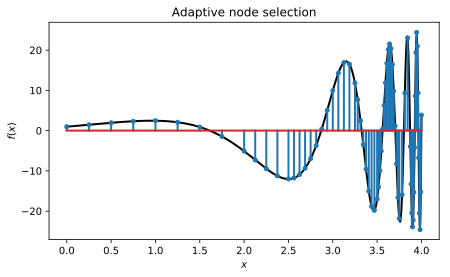

In [55]:
Q,t = FNC.intadapt(f,0,4,0.001)
print("number of nodes:",t.size)

x = linspace(0,4,600)
plot(x,f(x),"k")
stem(t,f(t))
xlabel("$x$"); ylabel("$f(x)$"); 
title("Adaptive node selection")

The error turns out to be a bit more than we requested. It's only an estimate, not a guarantee.

In [56]:
print("error:",I-Q)

error: -0.022002813037568014


Let's see how the number of integrand evaluations and the error vary with the requested tolerance.

In [57]:
tol_ = 10.0**arange(-4,-15,-1)
err_ = zeros(tol_.size)
num_ = zeros(tol_.size,dtype=int)
print("    tol         error     # f-evals")
for (i,tol) in enumerate(tol_):
    Q,t = FNC.intadapt(f,0,4,tol)
    err_[i] = I - Q
    num_[i] = t.size
    print(f"  {tol:6.1e}    {err_[i]:10.3e}    {num_[i]:6d}")

    tol         error     # f-evals
  1.0e-04    -4.195e-04       113
  1.0e-05     4.790e-05       181
  1.0e-06     6.314e-06       297
  1.0e-07    -6.639e-07       489
  1.0e-08     7.181e-08       757
  1.0e-09     1.265e-08      1193
  1.0e-10    -8.441e-10      2009
  1.0e-11     2.619e-11      3157
  1.0e-12     4.050e-11      4797
  1.0e-13    -1.879e-12      7997
  1.0e-14     2.212e-13     12609


As you can see, even though the errors are not less than the estimates, the two columns decrease in tandem. If we consider now the convergence not in $h$ (which is poorly defined) but in the number of nodes actually chosen, we come close to the fourth order accuracy of the underlying Simpson scheme.

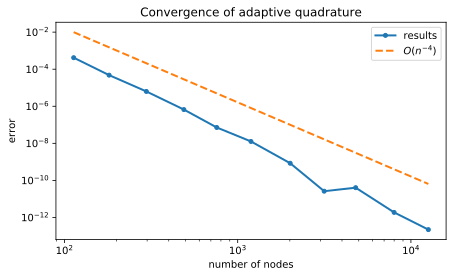

In [58]:
loglog(num_,abs(err_),"-o",label="results")
order4 = 0.01*(num_/num_[0])**(-4)
loglog(num_,order4,"--",label="$O(n^{-4})$")       
xlabel("number of nodes"); ylabel("error");
legend(); title("Convergence of adaptive quadrature");